# Perceptron

Perceptron é o modelo mais básico de rede neural, composto por um único neurônio, e consequentemente uma única camada. O algoritmo utiliza uma função degrau ( _step_ ) para fazer classificação binária. A figura abaixo permite uma visualização do modelo e do processo de classificação.

<img src="assets/percp1.png" alt="percep1" width="800"/>

## Introdução

O Perceptron foi inspirado na unidade básica de processamento do cérebro, i.e., o neurônio, e na forma como ele processa sinais. Foi inventado por Frank Rosenblatt, baseado no neurônio de McCulloch-Pitts. 

O modelo não é muito usado na prática (o modelo de neurônio adotado em uma rede do tipo Multi-Layer Perceptron é o Neurônio Sigmoidal), mas ainda assim muito importante de se entender pela sua simplicidade e importância histórica.

## Implementação

Assim como na aula anterior, podemos começar a nossa implementação importando os pacotes necessários e gerando um conjunto de dados aleatórios.

In [16]:
# Passo n° 1: Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

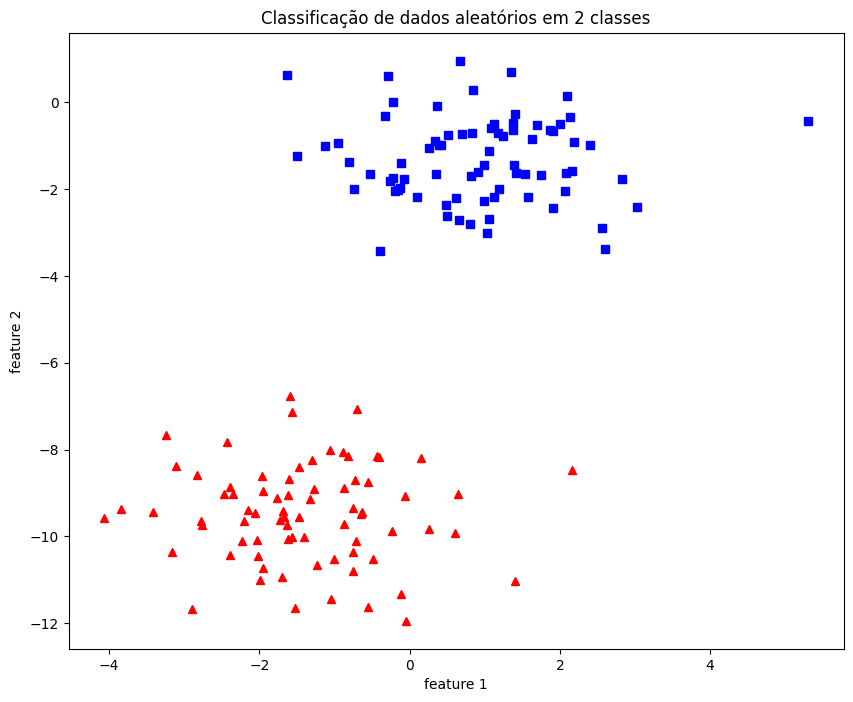

In [17]:
# Passo n° 2: Gerando dados para classificação

X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Classificação de dados aleatórios em 2 classes')
plt.show()

Podemos observar que foram formadas 2 classes, vermelha e azul, e nosso objetivo é separá-las por uma reta. Formalmente, queremos aprender o conjunto de parâmetros (pesos) que representam o melhor hiper-plano para separar as 2 classes.

Na regressão logística nós considerávamos a saída das probabilidades alimentando uma função Sigmoid com a saída da combinação linear entre as amostras e os pesos. No caso do Perceptron, a Sigmoid é substituida pela função degrau, a qual é definida da seguinte maneira:

\begin{equation}
    \hat{y} = g(z),
\end{equation}
onde $z = W^{T}x$ (combinação linear), $W^T$ é o vetor de pesos transposto, e $g(z)$ é definido como:



\begin{equation}
g(z)=
\begin{cases}
  1 & \text{se } z \geq 0\\
  0 &\text{se } z < 0.
\end{cases}
\end{equation}

<img src="assets/step.jpg" alt="step" width="500"/>



Diferente da regressão logística, o perceptron retorna apenas $0$ ou $1$, em vez de retornar as probabilidades da amostra pertencer à classe $0$ ou $1$.

In [18]:
# Passo n° 3a: criando a função step:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

# Passo n° 3a: criando a função sigmoide:
def sigmoide(z):
    return 1.0/(1+np.exp(-z))

def relu(z):
    return max(0,z)

## Perceptron como uma rede neural

Podemos entender o comportamento do Perceptron de modo visual olhando para imagem abaixo. Note que o peso $\theta_0$ representa o valor do viés (bias), sendo assim, $x_0$ é sempre igual a $1$.

<img src="assets/perceptron.png" alt="perceptron" width="400"/>


Para cada instância do conjunto de treinamento, nós computamos o produto escalar entre cada característica dessa instância e o respectivo peso ($W$). Em seguida, aplicamos a função degrau sobre esse valor para gerar o rótulo estimado $h_{w}(x)$ ou $\hat{y}$.

Se a amostra for classificada de forma incorreta, os pesos $W$ são ajustados. A regra para atualizar esses pesos é definida da seguinte maneira:



## Regra de atualização do Perceptron

Os pesos do Perceptron podem ser ajustados de forma similar à regra do Gradiente descendente, seguindo a regra:

\begin{equation}
    w_{j}^{(t+1)} :=w_j^{(t)}+\alpha(y^{i}-h_{w}(x^i))x_j^i,
\end{equation}
onde $\alpha$ é a taxa de aprendizagem. Note que apezar de parecido com a regressão logística, o Perceptron é bem diferente da regressão logística, pois não podemos interpretar as saídas como probabilidades, ou mesmo utilizar o método da maximização da verossimilhança para atualizar os pesos.

In [19]:
# Passo n° 3b: implementando o Perceptron:
lr = 0.1 # taxa de aprendizado.
epochs = 50 # Número de iterações.


print('lr = ', lr)
print('epochs = ', epochs)


# m-> número de amostras de treinamento
# n-> número de características por amostra
m, n = X.shape

# Inicializando os pesos (w) com zeros.
# n+1 pois deve haver um peso para o termo de bias.
w = np.zeros((n+1,1))

# Lista vazia para armazenar quantas amostras foram classificadas incorretamente 
# a cada iteração
n_miss_list = []

# treinamento
for epoch in range(epochs):

    # variável que armazena número de amostras classificadas com rótulo errado.
    n_miss = 0

    # loop que percorre todas as amostras de treinamento.
    for idx, x_i in enumerate(X):

        # Insere o valor 1 como primeira posição no vetor de características
        # esse valor é multiplicado pelo peso w_0, ou seja, o bias
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)

        # estima o novo rótulo.
        #y_hat = step_func(np.dot(x_i.T, w))
        b = np.dot(x_i.T, w) # w-> (n+1, 1)
        a = sigmoide(b)
        y_hat = np.round(a)

        # Compara o label predito com o rótulo real
        # função squeeze remove uma dimensão
        if (np.squeeze(y_hat) - y[idx]) != 0:
            # caso o classificador tenha errado (rótulo real diferente do rótulo predito), 
            # atualiza os pesos
            w += lr*((y[idx] - y_hat)*x_i) # GRADIENTE DESCENDENTE

            # incrementa o contador de erros.
            n_miss += 1

    # Adiciona o número de erros à lista de erros por época
    n_miss_list.append(n_miss)

lr =  0.1
epochs =  50


In [30]:
print("Erros de classificação nas iterações:")
print(n_miss_list)

Erros de classificação nas iterações:
[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Plotando o limite de decisão

Sabemos que o modelo toma suas decisões $\hat{y}=1$ quando $g(z)\geq0$ e $\hat{y}=0$ quando $g(z)<0$, podemos plotar nosso limite de decisão da seguinte maneira:

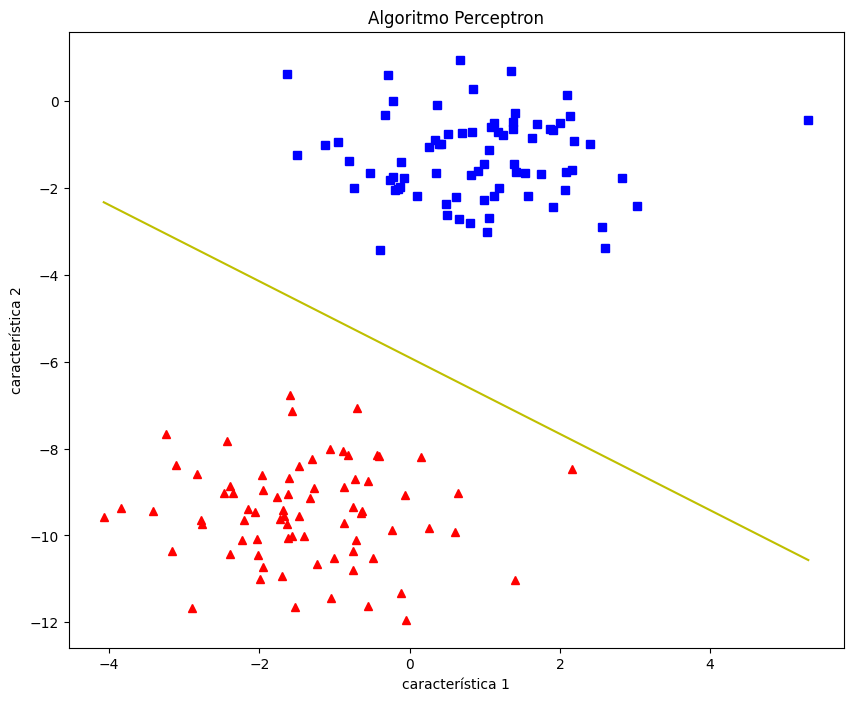

In [21]:
# Passo n° 4: avaliando o modelo:

# A equação da reta é definida por y=mx+c
# Então, igualamos mx+c = w0.x0 + w1.x1 + w2.x2
# Resolvendo podemos encontrar m e c
x1 = [min(X[:,0]), max(X[:,0])]
m = -w[1]/w[2]
c = -w[0]/w[2]
x2 = m*x1 + c

# Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("característica 1")
plt.ylabel("característica 2")
plt.title('Algoritmo Perceptron')
plt.plot(x1, x2, 'y-')

## Perceptron pelo scikit learn

Assim como a regressão linear e a regressão logística, o perceptron também está presente no scikit-learn:

In [22]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X, y = load_digits(return_X_y=True)

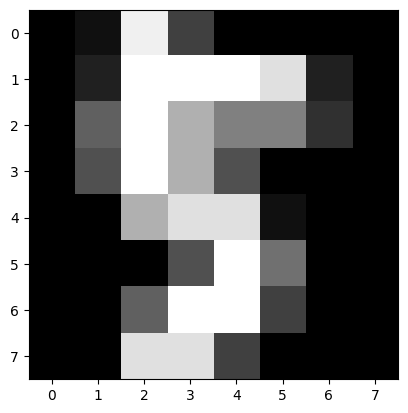

In [23]:
# Visualizando alguns digitos
sample = np.random.randint(0, len(X))
img = X[sample].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [25]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)

Perceptron()

In [26]:
x_test = scaler.transform(x_test)
y_pred = clf.predict(x_test)

In [27]:
print('Acurácia sobre conjunto de treinamento = ',clf.score(x_train, y_train))
print('Acurácia sobre conjunto de teste = ',clf.score(x_test, y_test))

Acurácia sobre conjunto de treinamento =  0.9805149617258176
Acurácia sobre conjunto de teste =  0.9361111111111111


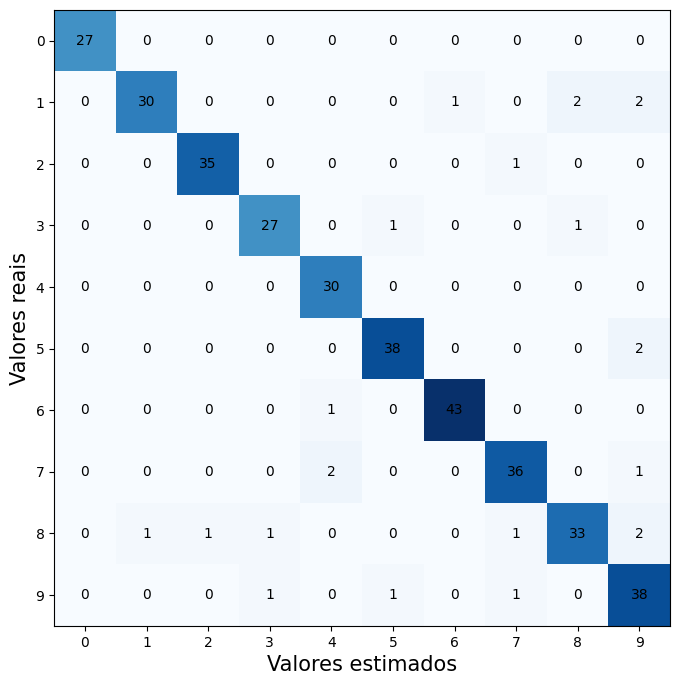

In [28]:
# plotando a matriz

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.86      0.91        35
           2       0.97      0.97      0.97        36
           3       0.93      0.93      0.93        29
           4       0.91      1.00      0.95        30
           5       0.95      0.95      0.95        40
           6       0.98      0.98      0.98        44
           7       0.92      0.92      0.92        39
           8       0.92      0.85      0.88        39
           9       0.84      0.93      0.88        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



## Limitações do Perceptron

1. Assim como a regressão logística, é um classificador linear que não pode ser usado para resolver problemas não linearmente separáveis.
2. O algoritmo é usado apenas para problemas de classificação binária.
3. Por usar uma função degrau, pequenas mudanças nos pesos são responsáveis por alterações significativas na saída, o que impossibilita a utilização de algoritmos de otimização do tipo gradiente descendente e, consequentemente, sua utilização para construção de redes mais profundas, e.g., multilayer perceptron.

Para resolver o problema mensionado no terceiro ponto, substituimos a função de ativação do tipo degrau para a função Sigmoid, i.e., substituimos o Perceptron pelo neurônio sigmoidal.

## Neurônio sigmoidal

Enquanto a função degrau apresenta uma saída 'hard', em que pequenas mudanças nos pesos podem apresentar uma mudança brusca na saída, a função sigmoidal apresenta uma saída mais suave, onde pequenas mudanças nos pesos representam pequenas mudanças nos valores de saída, que podem assumir valores entre 'zero' e 'um'. Esse detalhe permite utilizar o algoritmo gradiente descendente, o qual é utilizado em conjunto com backpropagation para treinar redes mais profundas. A figura a seguir relembra a função sigmoidal.

<img src="assets/log-reg-1.webp" alt="sigmoid" width="400"/>

Apesar da diferença na formulação, as funções de ativação Sigmoidal e Step são muito parecidas:
- Imagine que $z \equiv W^{T} x + b$ é um valor positivo muito grande:
    - Então $e^{−z}\approx 0$ e $\sigma(z) \approx 1$, como seria no Perceptron caso $W^{T}x + b$ fosse muito grande. 
- De modo similar, se $z \equiv W^{T}x + b$ é um valor negativo muito grande:
    - Então $e^{−z}\approx \infty$ e $\sigma(z) \approx 0$, como seria no Perceptron caso $W^{T}x + b$ fosse muito grande na direção negativa. 
- A diferença entre os 2 modelos acontece quando $z \equiv W^{T}x + b$ tem um tamanho moderado, em que a saída da sigmoid varia entre $0$ e $1$ (quando $z \equiv 0$ a saída da sigmoid é $0.5$).